In [1]:
#Import das Libs
import matplotlib as mpl
import numpy as np
import math
import cv2
from matplotlib import pyplot as plot

In [2]:
#Realiza-se o Upload da Imagem para o Google Colab.
#Em seguida, importa-se as imagens

img = cv2.imread('/content/A_mac_11.jpg')
template = cv2.imread('/content/T_mac2.jpg')

In [3]:
#Ordenando as Bandas RGB
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
template = cv2.cvtColor(template,cv2.COLOR_BGR2RGB)

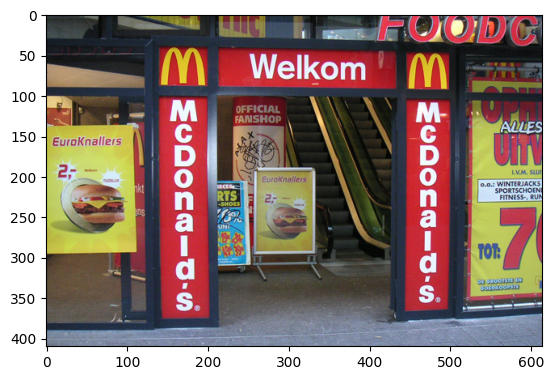

In [4]:
#Visualização da Imagem
plot.imshow(img,cmap='gray')
plot.show()

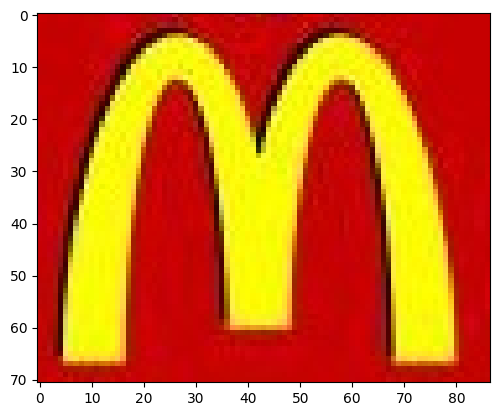

In [5]:
#Visualização do Template
plot.imshow(template,cmap='gray')
plot.show()

In [6]:
#Define-se os valores de Altura e Largura do Template

#Observação: Neste caso, é necessário redimensionar o template que está maior que os simbolos na imagem
#Observação2: Os valores de altura e largura devem ser números inteiros

h = int(template.shape[0]/1.3)
w = int(template.shape[1]/1.3)

In [7]:
#Após descobrir os valores de Altura e Largura, efetua-se o resize do template utilizando Interpolação.
#Interpolação é o método utilizado para preencher os pixels brancos que surgirão no momento do resize

dim = (w,h)
template = cv2.resize(template, dim, interpolation = cv2.INTER_CUBIC)

(66, 54)


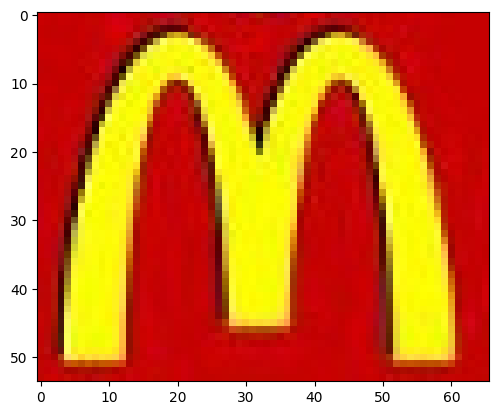

In [8]:
#Visualização dos Valores de Dimensão do Template
print(dim)

#Visualização do Template pós aplicação da Interpolação
plot.imshow(template, cmap='gray');

In [9]:
#Aplicação de Template Matching
res = cv2.matchTemplate(img,template,cv2.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [10]:
#Inicialmente, define-se uma valor de Thresold e localiza-se os pontos maiores que o Threshold definido.
threshold = 0.83
loc = np.where(res >= threshold)
print(loc)

(array([31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34,
       34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36,
       37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39,
       39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41,
       41, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44,
       44, 44, 45, 45, 45, 45, 45, 46, 46, 46, 46, 47, 47]), array([136, 137, 138, 135, 136, 137, 138, 139, 135, 136, 137, 138, 139,
       140, 135, 136, 137, 138, 139, 140, 134, 135, 136, 137, 138, 139,
       140, 134, 135, 136, 137, 138, 139, 140, 134, 135, 136, 137, 138,
       139, 140, 134, 135, 136, 137, 138, 139, 140, 134, 135, 136, 137,
       138, 139, 140, 134, 135, 136, 137, 138, 139, 140, 134, 135, 136,
       137, 138, 139, 140, 135, 136, 137, 138, 139, 140, 135, 136, 137,
       138, 139, 140, 135, 136, 137, 138, 139, 440, 136, 137, 138, 139,
       440, 136, 137, 138, 440, 137, 138]))


In [11]:
#Define-se o ponto de partida na imagem e inicia-se um contador de templates
top_left_ant = (0, 0)
cont=1

#Para cada pixel, coleta-se sua coordenada e adiciona-se os valores da dimensão do template previamente ajustado
for i in range (len(loc[0])):
    top_left = (loc[1][i], loc[0][i])
    bottom_right = (top_left[0] + w, top_left[1] + h)

    #Se ao menos um valor de uma coordenada for maior que 0,
    #Acrescenta-se um retangulo neste item identificado como template.

    if top_left[0] > top_left_ant[0] + w or top_left[1] > top_left_ant[1] + h :
        cv2.rectangle(img,top_left, bottom_right, (0,255,0), 2)
        cv2.putText(img,str(cont), bottom_right,1,2,(0,255,0),3,1)

        #Por fim, estabelece-se um novo ponto de partida após a identificação de um template.
        #Além de um contador para os objetos.

        top_left_ant = top_left
        cont = cont + 1

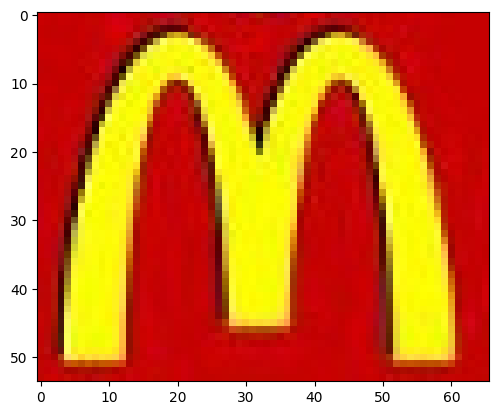

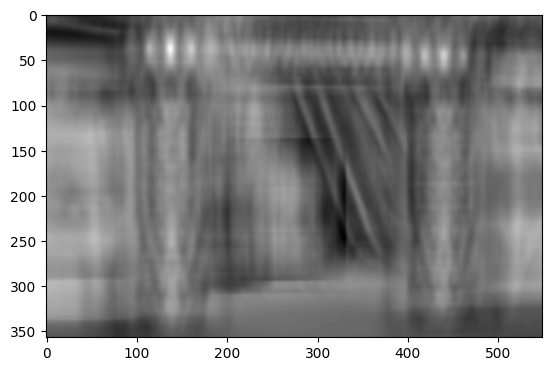

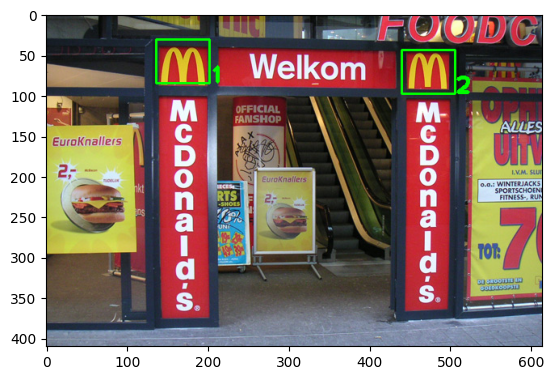

In [12]:
#Exibição das Imagens (template / Resultado do TemplateMatching / TemplateMatching)
plot.imshow(template,cmap = 'gray')
plot.show()
plot.imshow(res,cmap = 'gray')
plot.show()
plot.imshow(img,cmap = 'gray')